# Basic interactions with the Impresso python library

## Good to know before starting

This notebook is a quick introduction to the Impresso python library. It is a good starting point to understand how to interact with the library and how to use it to access the Impresso dataset. An Impresso account is required to access the data. If you don't have an account, you can register on the [Impresso Datalab page](https://impresso-project.ch/datalab/).


## Prerequisites

Install the `impresso` python library:

In [3]:
%pip install -q impresso

Note: you may need to restart the kernel to use updated packages.


# Initialize Impresso Client

In this cell, we initialize the Impresso client and authenticate it with the Impresso API. 
The `impresso` object allows us to interact with the API and perform various operations such as searching for articles, retrieving entities, and fetching facets. The following call will prompt you to enter your Impresso token if it has not been authenticated within the last few hours (the token has a short lifetime).

In [8]:
from impresso import connect

impresso = connect()

🎉 You are now connected to the Impresso API!  🎉


## Making first request

Let's start by making a simple request to the Impresso API. We will search for articles that contain the word "Titanic" in the text and order the results by date in an ascending order.

In [13]:
result = impresso.search.find(
    q="Titanic",
    order_by="date",
)
result

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
volkfreu1869-1872-06-02-a-i0025,ad,Publicité 10 Page 3,151,1,"[{'uid': 'volkfreu1869-1872-06-02-a-p0003', 'n...",True,93cbeutenbe Immobel-Versteigerung jii <*cbronu...,[article],OpenPublic,1872,[],[],de,"[{'fragment': ')iun, in bev ftf»onftcti Strnfi...",[{'pageUid': 'volkfreu1869-1872-06-02-a-p0003'...,[],[],False,1872-06-02T00:00:00+00:00,LU,[],[],BNL,"[{'relevance': 0.02, 'topic': {'uid': 'tm-de-a...",[],volkfreu1869-1872-06-02-a,,[issue],False,OpenPublic,1872-06-02T00:00:00+00:00,1872,volkfreu1869,volkfreu1869,[newspaper],[de],True,Volksfreund,1876.0,1869.0,28033,1087,4212,7,[],volkfreu1869-1869-02-23-a,,[issue],False,NotDefined,1869-02-23T00:00:00+00:00,1869,volkfreu1869-1876-12-31-a,,[issue],False,NotDefined,1876-12-31T00:00:00+00:00,1876,True
NZZ-1876-07-29-a-i0003,page,"sind , ft ist von",3982,1,"[{'uid': 'NZZ-1876-07-29-a-p0003', 'num': 3, '...",True,"sind , ft ist von inen kriegerischen Vorzügen ...",[article],Closed,1876,"[{'uid': 'aida-0001-54-Auch', 'relevance': 1},...",[],de,"[{'fragment': ' . Neckar , 8 . von Bremen . 23...","[{'pageUid': 'NZZ-1876-07-29-a-p0003', 'coords...",[],[],False,1876-07-29T00:00:00+00:00,CH,[],[],NZZ,"[{'relevance': 0.022, 'topic': {'uid': 'tm-de-...",[],NZZ-1876-07-29-a,,[issue],False,Closed,1876-07-29T00:00:00+00:00,1876,NZZ,NZZ,[newspaper],[de],True,Neue Zürcher Zeitung,2017.0,1780.0,559709,112672,561444,237,[],NZZ-1780-01-12-a,,[issue],False,NotDefined,1780-01-12T00:00:00+00:00,1780,NZZ-1950-12-31-a,,[issue],False,NotDefined,1950-12-31T00:00:00+00:00,1950,True
indeplux-1908-09-04-a-i0026,ar,Toujours plus grand,73,1,"[{'uid': 'indeplux-1908-09-04-a-p0003', 'num':...",True,Toujours plus grand La construction des deux* ...,[article],na,1908,[],[],fr,"[{'fragment': ' White-Star, pour le compte de ...","[{'pageUid': 'indeplux-1908-09-04-a-p0003', 'c...",[],[],False,1908-09-04T00:00:00+00:00,LU,[],[],BNL,"[{'relevance': 0.106, 'topic': {'uid': 'tm-fr-...",[],indeplux-1908-09-04-a,,[issue],False,Closed,1908-09-04T00:00:00+00:00,1908,indeplux,indeplux,[newspaper],[],True,L'indépendance luxembourgeoise,NaN,NaN,734687,18654,72896,0,[],indeplux-1871-10-01-a,,[issue],False,NotDefined,1871-10-01T00:00:00+00:00,1871,indeplux-1934-12-31-a,,[issue],False,NotDefined,1934-12-31T00:00:00+00:00,1934,True


The result of the search query is rendered as a notebook friendly preview when running in a Jupyter notebook. The preview contains the total number of results, the number of results returned in the current page, a link back to the Impresso App and a table with the preview of the data as a Pandas DataFrame (only the first 3 items are returned in the preview).

The result object has several properties that return the data in various formats:
 * `df` returns the result as a Pandas DataFrame
 * `raw` returns the result as a python list of dicts (the raw JSON response from the API)
 * `data` returns the result as a list of Pydantic objects

Explore the results as a pandas DataFrame:

In [14]:
result.df[:5]

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,...,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,
volkfreu1869-1872-06-02-a-i0025,ad,Publicité 10 Page 3,151,1,"[{'uid': 'volkfreu1869-1872-06-02-a-p0003', 'n...",True,93cbeutenbe Immobel-Versteigerung jii <*cbronu...,[article],OpenPublic,1872,...,1869-02-23T00:00:00+00:00,1869,volkfreu1869-1876-12-31-a,,[issue],False,NotDefined,1876-12-31T00:00:00+00:00,1876,True
NZZ-1876-07-29-a-i0003,page,"sind , ft ist von",3982,1,"[{'uid': 'NZZ-1876-07-29-a-p0003', 'num': 3, '...",True,"sind , ft ist von inen kriegerischen Vorzügen ...",[article],Closed,1876,...,1780-01-12T00:00:00+00:00,1780,NZZ-1950-12-31-a,,[issue],False,NotDefined,1950-12-31T00:00:00+00:00,1950,True
indeplux-1908-09-04-a-i0026,ar,Toujours plus grand,73,1,"[{'uid': 'indeplux-1908-09-04-a-p0003', 'num':...",True,Toujours plus grand La construction des deux* ...,[article],na,1908,...,1871-10-01T00:00:00+00:00,1871,indeplux-1934-12-31-a,,[issue],False,NotDefined,1934-12-31T00:00:00+00:00,1934,True
EXP-1908-09-23-a-i0077,ar,ETRANGER,950,1,"[{'uid': 'EXP-1908-09-23-a-p0005', 'num': 5, '...",False,ETRANGER Pour une lettre refusée. — Dans la pe...,[article],OpenPrivate,1908,...,1738-10-02T00:00:00+00:00,1738,EXP-2017-10-31-a,,[issue],False,NotDefined,2017-10-31T00:00:00+00:00,2017,True
indeplux-1909-04-10-a-i0042,ar,Ce que coûtent les gros bateaux,160,1,"[{'uid': 'indeplux-1909-04-10-a-p0002', 'num':...",True,Ce que coûtent les gros bateaux Les grands tra...,[article],na,1909,...,1871-10-01T00:00:00+00:00,1871,indeplux-1934-12-31-a,,[issue],False,NotDefined,1934-12-31T00:00:00+00:00,1934,True


## Documentation

Methods of the Impresso library are documented in the code and use Python [type hints](https://docs.python.org/3/library/typing.html) to further help with understanding what values various arguments accept. The hints are often activated on mouse hover, pressing tab or other IDE specific shortcuts.

This is what function documentation looks like in VSCode Jupyter notebook:

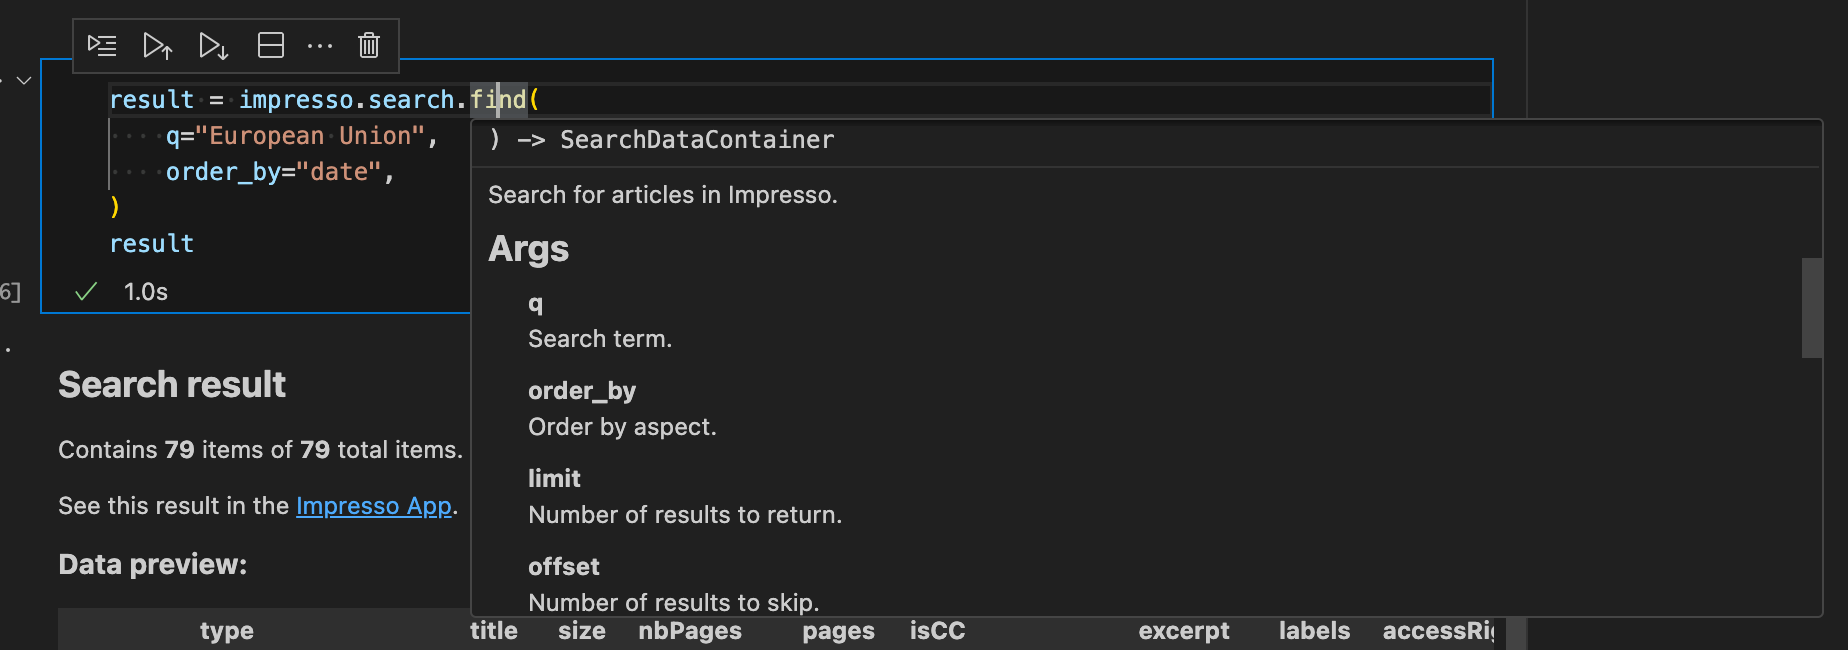

The same in Google Colab:

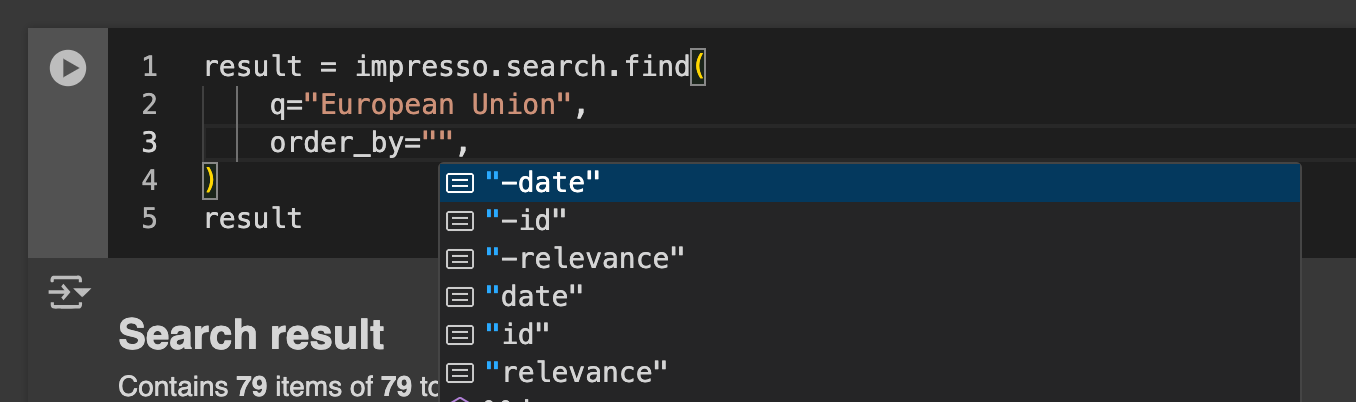

Type hints in VSCode Jupyter

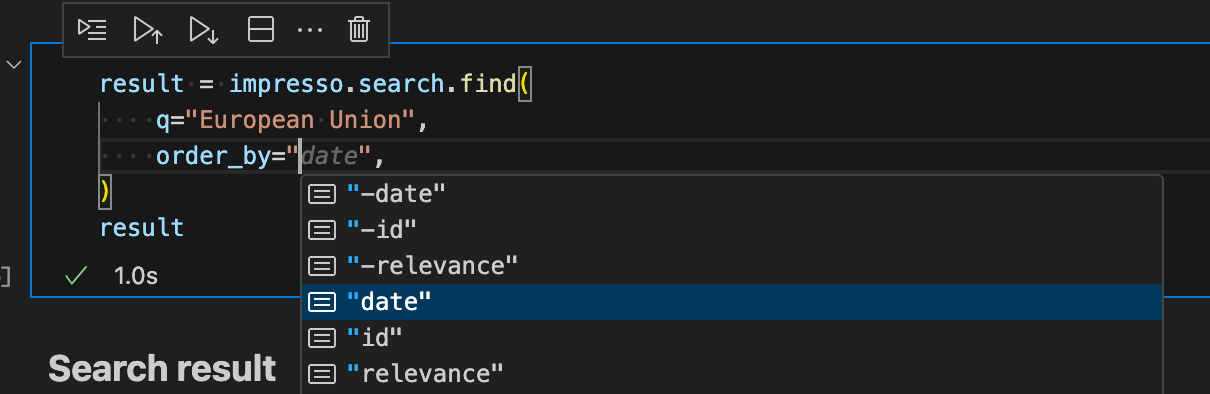

Type hints in Google Colab:

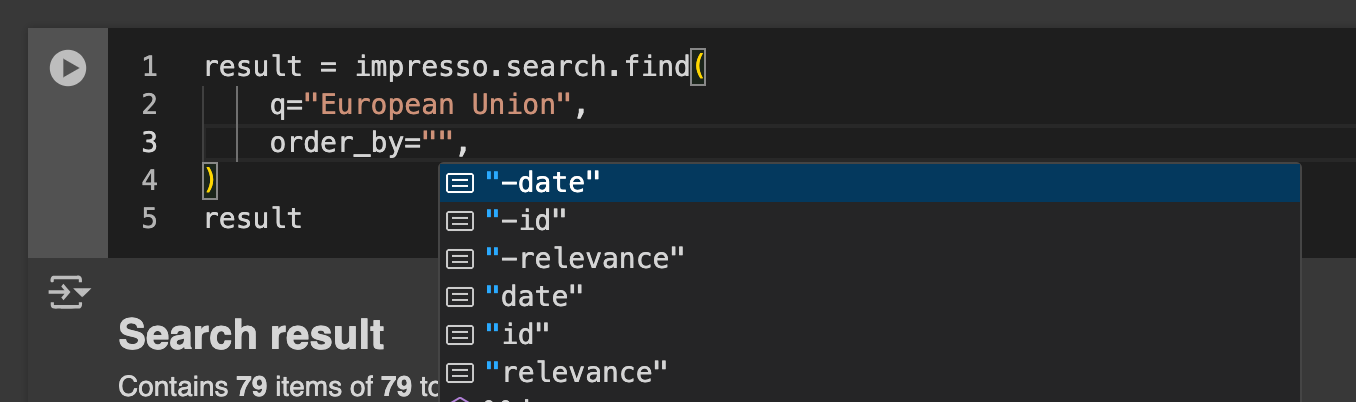


## Namespaces of the Impresso library

The Impresso library functionality is split into several namespaces that loosely follow the pages of the Impresso App. Each namespace normally contains a `find` method to search for a list of items and/or a `get` method to retrieve a single item by ID.

### Search and Article

The `search.find` method has been demonstrated in the previous example. The `articles.get` method can be used to retrieve an article by its ID.

In [16]:
result = impresso.articles.get("indeplux-1909-04-10-a-i0042")
result

,uid,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,content,mentions,v,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
0,indeplux-1909-04-10-a-i0042,ar,Ce que coûtent les gros bateaux,160,1,"[{'uid': 'indeplux-1909-04-10-a-p0002', 'num':...",True,Ce que coûtent les gros bateaux Les grands tra...,[article],na,1909,"[{'uid': 'aida-0001-54-FSC_Star', 'relevance':...",[],fr,[],"[{'pageUid': 'indeplux-1909-04-10-a-p0002', 'c...",[32],"[31, 69, 106, 140, 184, 222, 248, 282, 321, 35...",False,1909-04-10T00:00:00+00:00,LU,[],[],BNL,"[{'relevance': 0.399, 'topic': {'uid': 'tm-fr-...",Ce que coûtent les gros bateaux Les grands tra...,"[{'person': [], 'location': [[283, 4]]}]",,indeplux-1909-04-10-a,,[issue],False,Closed,1909-04-10T00:00:00+00:00,1909,indeplux,indeplux,[newspaper],[],True,L'indépendance luxembourgeoise,None,None,734687,18654,72896,0,[],indeplux-1871-10-01-a,,[issue],False,NotDefined,1871-10-01T00:00:00+00:00,1871,indeplux-1934-12-31-a,,[issue],False,NotDefined,1934-12-31T00:00:00+00:00,1934,True


### Newspaper

This namespace deals with newspapers available in the Impresso library.

In [19]:
# get a single newspaper with the most recent publication year
result = impresso.newspapers.find(limit=1, order_by="-endYear")
result

,acronym,labels,languages,included,name,endYear,startYear,countArticles,countIssues,countPages,deltaYear,properties,fetched,firstIssue.uid,firstIssue.cover,firstIssue.labels,firstIssue.fresh,firstIssue.accessRights,firstIssue.date,firstIssue.year,lastIssue.uid,lastIssue.cover,lastIssue.labels,lastIssue.fresh,lastIssue.accessRights,lastIssue.date,lastIssue.year
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,
EXP,EXP,[newspaper],[fr],True,L'Express,2018,1738,7786609,46472,703111,280,[],True,EXP-1738-10-02-a,,[issue],False,NotDefined,1738-10-02T00:00:00+00:00,1738,EXP-2017-10-31-a,,[issue],False,NotDefined,2017-10-31T00:00:00+00:00,2017


## Entities

Search and retrieve metadata of entities.

In [21]:
result = impresso.entities.find("Titanic")
result

,name,type,countItems,countMentions,wikidataId,wikidata.id,wikidata.type,wikidata.labels.fr,wikidata.labels.it,wikidata.labels.de,wikidata.labels.en,wikidata.descriptions.it,wikidata.descriptions.en,wikidata.descriptions.de,wikidata.descriptions.fr,wikidata.images,wikidata.coordinates.latitude,wikidata.coordinates.longitude,wikidata.coordinates.altitude,wikidata.coordinates.precision,wikidata.coordinates.globe,wikidata.birthDate,wikidata.deathDate,wikidata.birthPlace.id,wikidata.birthPlace.type,wikidata.birthPlace.labels.en,wikidata.birthPlace.labels.de,wikidata.birthPlace.labels.fr,wikidata.birthPlace.labels.it,wikidata.birthPlace.descriptions.de,wikidata.birthPlace.descriptions.en,wikidata.birthPlace.descriptions.it,wikidata.birthPlace.descriptions.fr,wikidata.birthPlace.images,wikidata.birthPlace.coordinates.latitude,wikidata.birthPlace.coordinates.longitude,wikidata.birthPlace.coordinates.altitude,wikidata.birthPlace.coordinates.precision,wikidata.birthPlace.coordinates.globe,wikidata.birthPlace.country.entity-type,wikidata.birthPlace.country.numeric-id,wikidata.birthPlace.country.id,wikidata.deathPlace.id,wikidata.deathPlace.type,wikidata.deathPlace.labels.fr,wikidata.deathPlace.labels.it,wikidata.deathPlace.labels.de,wikidata.deathPlace.labels.en,wikidata.deathPlace.descriptions.fr,wikidata.deathPlace.descriptions.en,wikidata.deathPlace.descriptions.it,wikidata.deathPlace.descriptions.de,wikidata.deathPlace.images,wikidata.deathPlace.coordinates.latitude,wikidata.deathPlace.coordinates.longitude,wikidata.deathPlace.coordinates.altitude,wikidata.deathPlace.coordinates.precision,wikidata.deathPlace.coordinates.globe,wikidata.deathPlace.country.entity-type,wikidata.deathPlace.country.numeric-id,wikidata.deathPlace.country.id
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aida-0001-50-Titanic_$28$1997_film$29$,Titanic (1997 film),person,7,7,Q44578,Q44578,item,Titanic,Titanic,Titanic,Titanic,film del 1997 diretto da James Cameron,1997 film by James Cameron,Film von James Cameron (1997),"film de James Cameron, sorti en 1997",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aida-0001-50-RMS_Titanic,RMS Titanic,person,3,3,Q25173,Q25173,location,Titanic,RMS Titanic,RMS Titanic,Titanic,"transatlantico britannico, affondato il 15 apr...","British transatlantic passenger liner, launche...","britisches Passagierschiff, das am 15. April 1...",paquebot transatlantique britannique,"[{'value': 'RMS Titanic 3.jpg', 'rank': 'norma...",41.7325,-49.946944,NaN,0.00001,http://www.wikidata.org/entity/Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aida-0001-50-Robert_Hichens_$28$RMS_Titanic$29$,Robert Hichens (RMS Titanic),person,3,3,Q456597,Q456597,human,Robert Hichens,Robert Hichens,Robert Hichens,Robert Hichens,marinaio britannico,British sailor (1882–1940) who survived the si...,Quartiermeister auf der Titanic,marin britannique,[{'value': 'Photo of Robert Hichens crew membe...,NaN,NaN,NaN,NaN,NaN,+1882-09-16T00:00:00Z,+1940-09-23T00:00:00Z,Q23148,location,Cornwall,Cornwall,Cornouailles,Cornovaglia,"Grafschaft in England, Großbritannien",historic county of England; Celtic nation,contea dell'Inghilterra,nation celtique du Royaume-Uni,"[{'value': 'Lands End, Cape Cornwall, Brisons ...",50.3,-4.9,NaN,0.016667,http://www.wikidata.org/entity/Q2,item,313136.0,Q313136,Q36405,location,Aberdeen,Aberdeen,Aberdeen,Aberdeen,ville en Écosse,"city in Scotland, United Kingdom",città scozzese,Stadt in Schottland,[{'value': 'Aberdeen from Tollohill Woods.JPG'...,57.15,-2.1,NaN,0.016667,http://www.wikidata.org/entity/Q2,item,145.0,Q145


In [24]:
result = impresso.entities.get("aida-0001-50-RMS_Titanic")
result

,name,type,countItems,countMentions,wikidataId,wikidata.coordinates.latitude,wikidata.coordinates.longitude,wikidata.coordinates.altitude,wikidata.coordinates.precision,wikidata.coordinates.globe,wikidata.id,wikidata.type,wikidata.labels.it,wikidata.labels.de,wikidata.labels.en,wikidata.labels.fr,wikidata.descriptions.it,wikidata.descriptions.en,wikidata.descriptions.de,wikidata.descriptions.fr,wikidata.images
uid,,,,,,,,,,,,,,,,,,,,,
aida-0001-50-RMS_Titanic,RMS Titanic,person,3,3,Q25173,41.7325,-49.946944,None,0.00001,http://www.wikidata.org/entity/Q2,Q25173,location,RMS Titanic,RMS Titanic,Titanic,Titanic,"transatlantico britannico, affondato il 15 apr...","British transatlantic passenger liner, launche...","britisches Passagierschiff, das am 15. April 1...",paquebot transatlantique britannique,"[{'value': 'RMS Titanic 3.jpg', 'rank': 'norma..."


### Collections

Manage your own collections.

In [62]:
result = impresso.collections.find(order_by="-size")
if result.size == 0:
    "No collections found"
else:
    print("%s collections found" % result.size)
    first_collection_id = result.df.index[0]
    print("First collection contains %i items" % result.df["countItems"].iloc[0])
    
    first_collection_items = impresso.search.find(collection_id=first_collection_id)
    print(
        "Got first %i items in the collection. The first item is: %s" % \
        (first_collection_items.size, first_collection_items.df["title"].iloc[0])
    )

    # Find an article and add it to the collection
    titanic_search_result = impresso.search.find(q="Titanic", limit=1)
    titanic_search_first_item_id = titanic_search_result.df.index[0]
    print("Adding article %s to the collection" % titanic_search_first_item_id)

    impresso.collections.add_items(first_collection_id, [titanic_search_first_item_id])
    print("Added article to collection")

    # Then remove the first article from the collection
    first_article_id = first_collection_items.df.index[0]
    impresso.collections.remove_items(first_collection_id, [first_article_id])
    print("Removed article %s from collection" % first_article_id)


3 collections found
First collection contains 1 items
Got first 100 items in the collection. The first item is: Inland
Adding article FZG-1962-04-14-a-i0079 to the collection
Added article to collection
Removed article BNN-1886-02-18-a-i0030 from collection


### Text reuse

Search for text reuse.

In [4]:
# get 5 text reuse clusters starting from the second one.
# The clusters are ordered by the number of passages they contain (descending).
clusters = impresso.text_reuse.clusters.find(
    text="pandemie",
    offset=2,
    limit=5,
    order_by="-passages-count",
)
clusters

,textSample,cluster.lexicalOverlap,cluster.clusterSize,cluster.timeCoverage.from,cluster.timeCoverage.to
cluster.id,,,,,
tr-nobp-all-v01-c146029132206,12 mars 2003 :\nDébut de la pandémie\nde pneum...,46.846847,6,2008-03-12,2016-03-12
tr-nobp-all-v01-c42949911745,8 avril 1973 : décès\nde Pablo Picasso\nL’ÉPHÉ...,40.776699,6,2010-04-08,2017-04-08
tr-nobp-all-v01-c34360219507,12 mars 2003 :\nDébut de la pandémie\nde pneum...,46.153846,5,2009-03-12,2016-03-12


In [5]:
# get passages of the first cluster
impresso.text_reuse.passages.find(
    cluster_id=clusters.df.index[0],
)

,offsetStart,offsetEnd,content,title,pageNumbers,collections,connectedClusters,isFront,size,date,pageRegions,article.id,textReuseCluster.id,textReuseCluster.clusterSize,textReuseCluster.timeDifferenceDay,textReuseCluster.lexicalOverlap,newspaper.id,issue.id
id,,,,,,,,,,,,,,,,,,
c146029132206-EXP-2011-03-12-a-i0253@0:858,0,858,12 mars 2003 :\nun nouveau virus\ndébarque\nL’...,12 mars 2003: un nouveau virus débarque,[29],[],"[{'id': 'tr-nobp-all-v01-c137439093331'}, {'id...",False,858,2011-03-12T00:00:00+00:00,"[1168,251,473,897]",EXP-2011-03-12-a-i0253,tr-nobp-all-v01-c146029132206,6,2922,46.846847,EXP,EXP-2011-03-12-a
c146029132206-EXP-2010-03-12-a-i0236@8:645,8,645,2003 : l’Organisation mondiale\nde la santé la...,12 mars 2003: l’Organisation mondiale de la sa...,[29],[],"[{'id': 'tr-nobp-all-v01-c137439093334'}, {'id...",False,637,2010-03-12T00:00:00+00:00,"[612,251,1064,435]",EXP-2010-03-12-a-i0236,tr-nobp-all-v01-c146029132206,6,2922,46.846847,EXP,EXP-2010-03-12-a
c146029132206-IMP-2015-03-12-a-i0257@0:1027,0,1027,12 mars 2003 :\ndébut de la pandémie\nde pneum...,12 mars 2003: début de la pandémie de pneumopa...,[31],[],"[{'id': 'tr-nobp-all-v01-c146029132206'}, {'id...",False,1027,2015-03-12T00:00:00+00:00,"[1383,635,318,822]",IMP-2015-03-12-a-i0257,tr-nobp-all-v01-c146029132206,6,2922,46.846847,IMP,IMP-2015-03-12-a


### Facets

Some namespaces have a `facet` method that can be used to retrieve various facets for the namespace index.
Below are examples of how to get various facets for the `search` and `entities` namespaces. The `facet` call accepts the same filter arguments that can be passed to the `find` method. All facets come with a preview graph that can be used to visually assess the query and adjust it if necessary.

,count
val,
1871-10-02T00:00:00Z,1
1875-10-02T00:00:00Z,1
1907-10-02T00:00:00Z,2

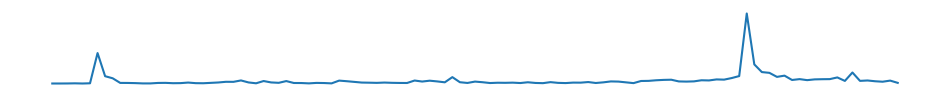

In [14]:
impresso.search.facet(facet="daterange", q="titanic")

,count
val,
1798-03-10T00:00:00Z,0
1799-03-10T00:00:00Z,0
1800-03-10T00:00:00Z,0

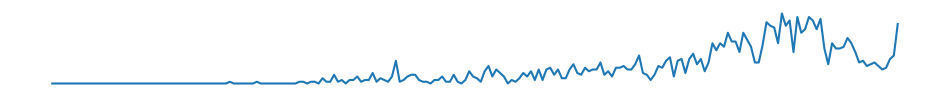

In [16]:
# get the number of Text Reuse clusters with a lexical overlap between 1 and 2 for every date
impresso.text_reuse.clusters.facet("daterange", lexical_overlap=(1, 2))

### Tools - Named entity recognition

Impresso API has its own Named entity recognition (NER) service trained on the Impresso corpus. It allows to locate and classify named entities mentioned in unstructured text into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc.

In [ ]:
text = """
Jean-Baptiste Nicolas Robert Schuman ( 
29 June 1886 – 4 September 1963) was a Luxembourg-born French 
statesman. Schuman was a Christian democratic (Popular 
Republican Movement) political thinker and activist. 
"""
result = impresso.tools.ner(
    text=text
)
result